In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

In [93]:
deepgreen = pd.read_excel('DeepGreen_v4.xlsx', sheet_name='Deep green_Setaria gene', skiprows=1).dropna(subset=['aa seq'])
deepgreen['aa seq'] = deepgreen['aa seq'].str.strip('*')
deepgreen.head()

,Locus,Transcript,Defline in Setaria,Manual curation notes,Cluster,Best hit in Chlamy,Defline in Chlamy,Mutual best hit,Reverse blast to Setaria,Defline in Setaria.1,...,Arabi-defline,Unnamed: 12,Mutual best hit.1,Reverse blast to Setaria.1,Defline in Setaria.2,Priority in Version3,Priority in version4 (after check the homolog in Arabidopsis),Green cut,in deepgreen arabidopsis list,aa seq
0,Sevir.4G111100,Sevir.4G111100.3,NaN,"RING finger domain, transmembrane domain, unkn...",Cluster 14046,Cre01.g000750.t1.1,zinc finger protein,yes,NaN,NaN,...,RING/U-box superfamily protein,Sevir.4G111100,yes,NaN,NaN,2.0,2.0,NaN,NaN,MNILNALVSFASRWFLYFVVAVVILAVFYCFLKQLADDAGTEHEPI...
1,Sevir.1G091000,Sevir.1G091000.1,NaN,NaN,Cluster 13965,Cre01.g000800.t2.1,Conserved in the Green Lineage,yes,NaN,NaN,...,hypothetical protein,Sevir.4G283200,no,NaN,NaN,1.0,1.0,At1g78995,AT1G78995,MRSPTKPGGVPAAIRGGRKLGAGVVRLLQAPAVVALAAALAVSAPA...
2,Sevir.4G283200,Sevir.4G283200.1,NaN,NaN,Cluster 13965,Cre01.g000800.t2.1,Conserved in the Green Lineage,no,NaN,NaN,...,hypothetical protein,Sevir.4G283200,yes,NaN,NaN,1.0,1.0,At1g78995,AT1G78995,MTAAAQAVVAVALAAILSTPAPQPDTFSNIPPTLSGGDGKAERIKH...
3,Sevir.7G094500,Sevir.7G094500.1,(1 of 2) PF07082 - Protein of unknown function...,NaN,Cluster 4915,Cre01.g000900.t1.2,Conserved in the Plant Lineage and Diatoms,yes,NaN,NaN,...,Gut esterase (DUF1350),Sevir.7G094500,yes,NaN,NaN,1.0,1.0,At5g47860,AT5G47860,MIRMAAASPPPASAVRVRGGGGAAASSSARLFTGPRSRVAAPIGRG...
4,Sevir.3G108100,Sevir.3G108100.2,(1 of 1) KOG1333 - Uncharacterized conserved p...,NaN,Cluster 2574,Cre01.g002700.t1.2,(1 of 1) KOG1333 - Uncharacterized conserved p...,yes,NaN,NaN,...,Transducin/WD40 repeat-like superfamily protein,Sevir.9G108700,no,Sevir.9G108700,"WD domain, G-beta repeat",1.0,4.0,NaN,NaN,MENVRYAEELVREFLVFRGFTSTLQAYESELSTEIGRNFQVDKILD...


In [94]:
from itertools import groupby
import gzip

def fasta_iter():
    """
    given a fasta file. yield tuples of header, sequence
    """
    with gzip.open('UP000298652_4556.fasta.gz', 'rt') as fh:
        grouper = (x[1] for x in groupby(fh, lambda line: line[0] == ">"))
        for item in grouper:
            headerStr = item.__next__()[1:].strip()
            seq = "".join(s.strip() for s in grouper.__next__())
            yield headerStr, seq
            
seq_df = pd.DataFrame(fasta_iter(), columns=['header', 'sequence'])
seq_df['accession'] = seq_df.header.str.extract('\|(.*)\|')
seq_df.shape

(38120, 3)

In [95]:
len(deepgreen)

875

In [130]:
seq_df.head()

,header,sequence,accession
0,tr|A0A0U2HKN4|A0A0U2HKN4_SETVI 30S ribosomal p...,MSRRGTAEKRTAKSDPIFRNRLVNMVVNRIMKDGKKSLAYQILYRA...,A0A0U2HKN4
1,tr|A0A0U2I6E5|A0A0U2I6E5_SETVI 30S ribosomal p...,MTKAIPKIGSRKKVRIGLRRNARFSLRKSARRITKGVIHVQASFNN...,A0A0U2I6E5
2,tr|A0A0U2IBR5|A0A0U2IBR5_SETVI DNA-directed RN...,MVREEVTGSTQTLEWKCVESRVDSKRLYYGRFILSPLRKGQADTVG...,A0A0U2IBR5
3,tr|A0A0U2JRF9|A0A0U2JRF9_SETVI Photosystem I a...,MNWRSEHIWIELLKGSRKRGNFFWACILFLGSLGFLAVGASSYLGK...,A0A0U2JRF9
4,tr|A0A0U2JRG3|A0A0U2JRG3_SETVI Photosystem II ...,MGLPWYRVHTVVLNDPGRLLSVHIMHTALVSGWAGSMALYELAVFD...,A0A0U2JRG3


In [96]:
# A couple missing proteins
deepgreen[~deepgreen['aa seq'].str.strip('*').isin(seq_df.sequence)]

,Locus,Transcript,Defline in Setaria,Manual curation notes,Cluster,Best hit in Chlamy,Defline in Chlamy,Mutual best hit,Reverse blast to Setaria,Defline in Setaria.1,...,Arabi-defline,Unnamed: 12,Mutual best hit.1,Reverse blast to Setaria.1,Defline in Setaria.2,Priority in Version3,Priority in version4 (after check the homolog in Arabidopsis),Green cut,in deepgreen arabidopsis list,aa seq
166,Sevir.4G255800,Sevir.4G255800.1,NaN,"glutamine binding, amino acid transport, anthr...",Cluster 1074,Cre03.g181400.t1.1,Aminodeoxychorismate synthase,yes,NaN,NaN,...,para-aminobenzoate (PABA) synthase family protein,Sevir.4G255800,yes,NaN,NaN,3.0,4.0,NaN,NaN,MAALRLPAPPAARWAPLPSQVSAPAAAAATAVARRVRPPRRLVALR...
737,Sevir.6G241600,Sevir.6G241600.3,(1 of 2) PTHR21530//PTHR21530:SF1 - PHEROMONE ...,NaN,Cluster 6878,Cre16.g677800.t1.2,(1 of 1) PTHR21530//PTHR21530:SF1 - PHEROMONE ...,no,NaN,NaN,...,TraB family protein,Sevir.6G241500,no,NaN,NaN,2.0,2.0,NaN,NaN,AGEVDGGGATRGSCRRSAAVGGRAPPGTTTSGCCVVQGGRRHLGGA...


In [102]:
merged_deepgreen = deepgreen[['Locus', 'Transcript', 'aa seq']].merge(seq_df, left_on='aa seq', right_on='sequence').drop(['aa seq'], 1)

In [105]:
import os
dg_dir = '/ccs/home/pstjohn/project_work/deepgreen'
seq_df.to_parquet(os.path.join(dg_dir, 'setaria.parquet'))

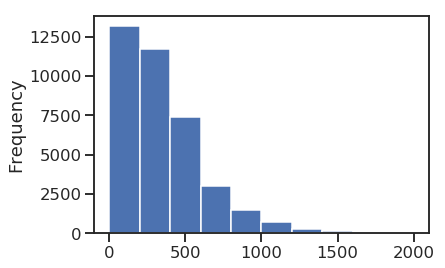

In [117]:
seq_df.sequence.apply(len).plot.hist(range=(0, 2000))

In [114]:
seq_df.head()

,header,sequence,accession
0,tr|A0A0U2HKN4|A0A0U2HKN4_SETVI 30S ribosomal p...,MSRRGTAEKRTAKSDPIFRNRLVNMVVNRIMKDGKKSLAYQILYRA...,A0A0U2HKN4
1,tr|A0A0U2I6E5|A0A0U2I6E5_SETVI 30S ribosomal p...,MTKAIPKIGSRKKVRIGLRRNARFSLRKSARRITKGVIHVQASFNN...,A0A0U2I6E5
2,tr|A0A0U2IBR5|A0A0U2IBR5_SETVI DNA-directed RN...,MVREEVTGSTQTLEWKCVESRVDSKRLYYGRFILSPLRKGQADTVG...,A0A0U2IBR5
3,tr|A0A0U2JRF9|A0A0U2JRF9_SETVI Photosystem I a...,MNWRSEHIWIELLKGSRKRGNFFWACILFLGSLGFLAVGASSYLGK...,A0A0U2JRF9
4,tr|A0A0U2JRG3|A0A0U2JRG3_SETVI Photosystem II ...,MGLPWYRVHTVVLNDPGRLLSVHIMHTALVSGWAGSMALYELAVFD...,A0A0U2JRG3


In [120]:
preds = np.random.randn(1000, 4)

In [126]:
protein_idx, go_idx = np.where(preds > 0)

In [127]:
protein_idx

array([  0,   1,   1, ..., 997, 997, 999])

In [129]:
np.savez_compressed('deepgreen_accessions.npz', dg_list=merged_deepgreen['accession'].drop_duplicates().values.astype(str))

In [132]:
merged_deepgreen.to_csv('deepgreen_merged_with_accessions.csv', index=False)